### Sobel Pipeline with Noise Reduction

<ol>
<li>Grayscale conversion: The input image is first converted into a grayscale image to simplify the processing.</li>

<li>Noise reduction: Various techniques can be used to reduce noise in the image, such as Gaussian blur, median filtering, or bilateral filtering. These techniques help to smooth out the image and reduce the impact of noise on the edge detection process.</li>

<li>Horizontal and vertical Sobel filtering: The Sobel operator is applied to the noise-reduced grayscale image in both the horizontal and vertical directions. The Sobel operator is a small 3x3 matrix that is convolved with the image. The result of this convolution highlights edges in the image.</li>

<li>Magnitude calculation: The horizontal and vertical edge maps are combined to obtain a single edge map. This is done by calculating the magnitude of the gradient at each pixel. The magnitude is computed using the Pythagorean theorem, which involves taking the square root of the sum of the squares of the horizontal and vertical gradients.<br>
</li>

<li>Thresholding: Finally, a threshold is applied to the edge map to produce a binary image, where the edges are represented by white pixels and the non-edges are represented by black pixels. This threshold is usually set to a value that separates the edges from the non-edges based on the magnitude of the gradient.</li>

</ol>

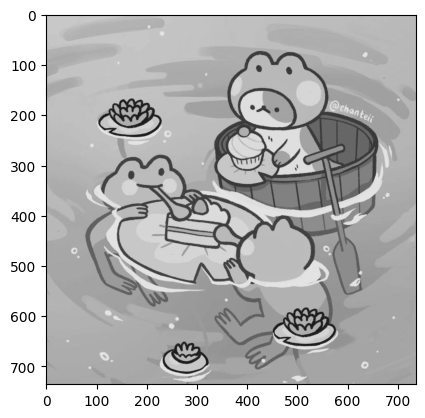

In [6]:
#Import Libraries
import cv2
import numpy as np
import copy
import matplotlib.pyplot as plt

#Saving the image in a variable
img = cv2.imread('../Images/frogsDining.jpeg')

#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#plt.imshow(img)

#convert to grayscale
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img, cmap='gray')

Text(0.5, 1.0, 'Gaussian Filter')

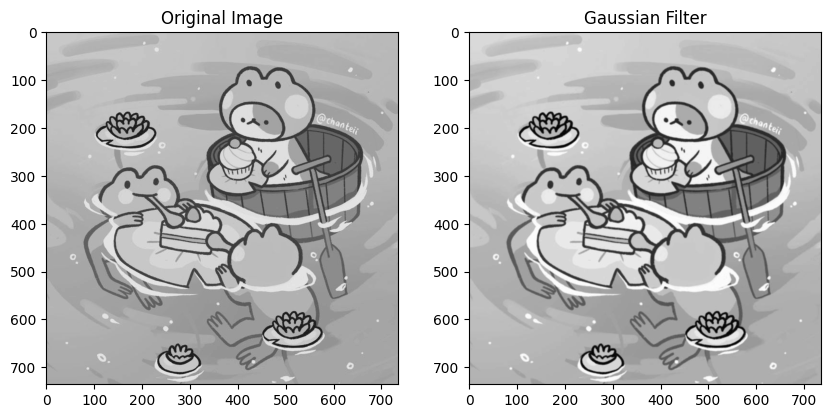

In [7]:
# Gaussian filter 
gaussian_filter = np.array([[1,2,1],[2,4,2],[1,2,1]], dtype=np.float32) / 16

# Convolve with the image
imgGaussian = cv2.filter2D(img, -1, gaussian_filter)

# Plot size
fig  = plt.figure(figsize = (10,10))

# Create subplots

# Left Image
fig.add_subplot(1,2,1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

# Right Image
fig.add_subplot(1,2,2)
plt.imshow(imgGaussian, cmap='gray')
plt.title('Gaussian Filter')

Text(0.5, 1.0, 'Sobel Y Edge Detection')

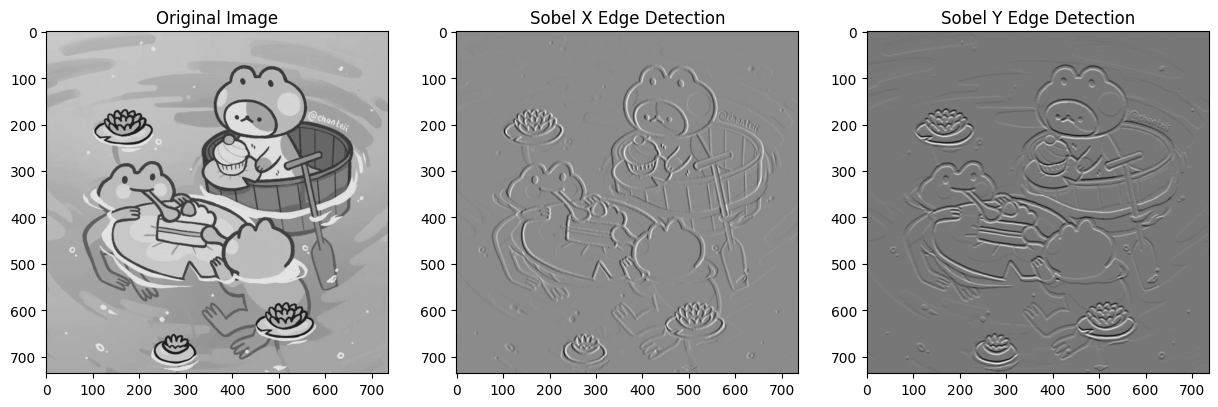

In [8]:

#sobel
sobelx = cv2.Sobel(imgGaussian, cv2.CV_64F, 1, 0, ksize=3)
sobely = cv2.Sobel(imgGaussian, cv2.CV_64F, 0, 1, ksize=3)

# Plot the combined image
fig = plt.figure(figsize = (15,15))

# Create subplots
# Left Image
fig.add_subplot(1,3,1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

# Center Image
fig.add_subplot(1,3,2)
plt.imshow(sobelx, cmap='gray')
plt.title('Sobel X Edge Detection')

# Right image
fig.add_subplot(1,3,3)
plt.imshow(sobely, cmap='gray')
plt.title('Sobel Y Edge Detection')

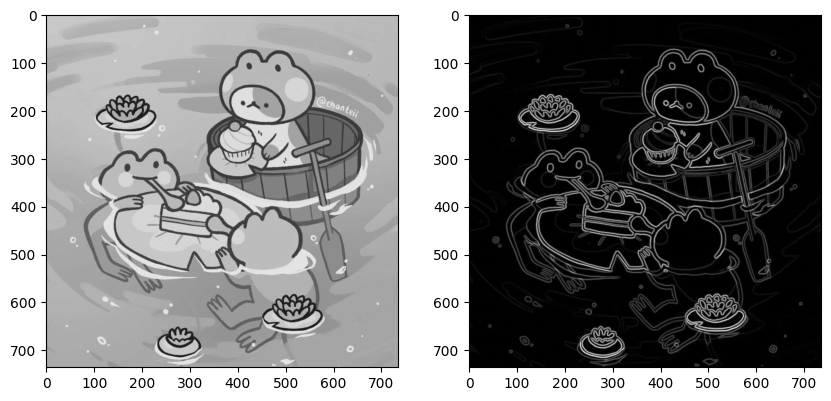

In [9]:
#magnitude
mag = cv2.magnitude(sobelx, sobely)

fig = plt.figure(figsize = (10,10))

# Left image
fig.add_subplot(1,2,1)
plt.imshow(img, cmap='gray')

# Right image
fig.add_subplot(1,2,2)
plt.imshow(mag, cmap='gray')

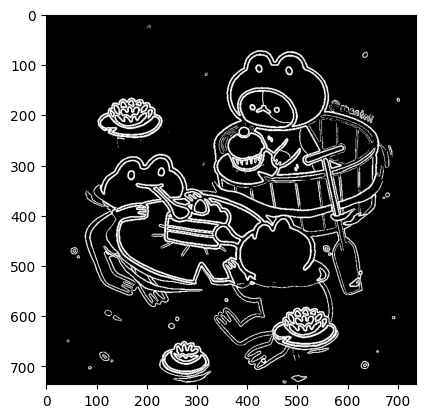

In [12]:
#threshold
th, imgOcvThres = cv2.threshold(mag, 100, 255, cv2.THRESH_BINARY)
plt.imshow(imgOcvThres, cmap ="gray")